# 1. Introdução

Algum texto aqui.

In [1]:
# imports - dataset e graficos
import pandas as pd
import numpy as np

In [ ]:
# imports machine learning

# 2. Dataset (Visualizando as informações)

Algum texto aqui.

In [2]:
# lendo o dataset

df_base = pd.read_csv('./dataset/df_arabica_clean.csv')

df_base.head()

,Unnamed: 0,ID,Country of Origin,Farm Name,Lot Number,Mill,ICO Number,Company,Altitude,Region,...,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Expiration,Certification Body,Certification Address,Certification Contact
0,0,0,Colombia,Finca El Paraiso,CQU2022015,Finca El Paraiso,NaN,Coffee Quality Union,1700-1930,"Piendamo,Cauca",...,89.33,11.8,0,0,green,3,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
1,1,1,Taiwan,Royal Bean Geisha Estate,"The 2022 Pacific Rim Coffee Summit,T037",Royal Bean Geisha Estate,NaN,Taiwan Coffee Laboratory,1200,Chiayi,...,87.58,10.5,0,0,blue-green,0,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
2,2,2,Laos,OKLAO coffee farms,"The 2022 Pacific Rim Coffee Summit,LA01",oklao coffee processing plant,NaN,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,...,87.42,10.4,0,0,yellowish,2,"November 15th, 2023",Taiwan Coffee Laboratory 台灣咖啡研究室,"QAHWAH CO., LTD 4F, No. 225, Sec. 3, Beixin Rd...","Lin, Jen-An Neil 林仁安 - 886-289116612"
3,3,3,Costa Rica,La Cumbre,CQU2022017,La Montana Tarrazu MIll,NaN,Coffee Quality Union,1900,"Los Santos,Tarrazu",...,87.17,11.8,0,0,green,0,"September 21st, 2023",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901
4,4,4,Colombia,Finca Santuario,CQU2023002,Finca Santuario,NaN,Coffee Quality Union,1850-2100,"Popayan,Cauca",...,87.08,11.6,0,2,yellow-green,2,"March 5th, 2024",Japan Coffee Exchange,"〒413-0002 静岡県熱海市伊豆山１１７３−５８ 1173-58 Izusan, Ata...",松澤 宏樹 Koju Matsuzawa - +81(0)9085642901


In [3]:
df_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

## 2.1. Removendo colunas que não serão utilizadas

In [4]:
# removendo colunas não relacionadas
df_clean = df_base.copy()

drop_columns = ['Unnamed: 0', 'ID', 'Lot Number', 'ICO Number',
                'Mill', 'Producer', 'Number of Bags', 'Bag Weight',
                'In-Country Partner', 'Grading Date', 'Owner',
                'Expiration', 'Certification Body',
                'Certification Address', 'Certification Contact']

df_clean.drop(columns=drop_columns, axis=1, inplace=True)

df_clean.head()

,Country of Origin,Farm Name,Company,Altitude,Region,Harvest Year,Variety,Status,Processing Method,Aroma,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,Colombia,Finca El Paraiso,Coffee Quality Union,1700-1930,"Piendamo,Cauca",2021 / 2022,Castillo,Completed,Double Anaerobic Washed,8.58,...,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200,Chiayi,2021 / 2022,Gesha,Completed,Washed / Wet,8.50,...,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300,Laos Borofen Plateau,2021 / 2022,Java,Completed,Semi Washed,8.33,...,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2
3,Costa Rica,La Cumbre,Coffee Quality Union,1900,"Los Santos,Tarrazu",2022,Gesha,Completed,Washed / Wet,8.08,...,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0
4,Colombia,Finca Santuario,Coffee Quality Union,1850-2100,"Popayan,Cauca",2022,Red Bourbon,Completed,"Honey,Mossto",8.33,...,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2


## 2.2. Limpando os valores no dataset

In [5]:
# limpando os valores das colunas
import pandas as pd

def unique_values_report(df: pd.DataFrame):
    columns = df.columns.to_list()

    for col in columns:
        col_values = df[col].value_counts(normalize=True)
        print("===========")
        print(col_values)
        print("===========")

In [ ]:
unique_values_report(df_clean)

Algumas colunas, que serão utilizadas para análise posterior do problema, precisam ter os dados limpos.
São elas:
| Coluna | Problema | Solução |
| :---: | :---: | :---: |
| Altitude | Valores Múltiplos na mesma coluna | Separação em 2 colunas (Lowest Altitude, Highest Altitude) |
| Harvest Year | Valores Múltiplos na mesma coluna | Separação em 2 colunas (Initial Harvest Year, Final Harvest Year) |
| Processing Method | Valores com erros de digitação ou padronização | Padronização em direção aos valores mais frequentes |
| Color | Valores com erros de digitação ou padronização | Padronização em direção aos valores mais frequentes |


In [6]:
df_clean['Altitude'].unique()

array(['1700-1930', '1200', '1300', '1900', '1850-2100', '1668', '1250',
       '1400-1700', '1800-2200', '2000', '1900-2000', '1850', '1100',
       '1900-2100', '1570-1600', '850', '1500-1700', '1350', '1060',
       '600', '150-250', '668', '1950', '2150 - 2350', '1700', '650',
       '1600-1900', '300-500', '1000', '800', '1905', '150', '1600',
       '4700', '350-400', '230', '1750', '1654', '1400', '4895',
       '200-300', '700', '1450', '520', '1368', '1943', '400',
       '1300-1400', '2361', '1500', '2100', '1250-1350', '1500-1600',
       '1800', '1600-1750', '1411', '4895 A 5650', '400-600', nan,
       '200-400', '1470', '250-400', '250-300', '1200 - 1580',
       '1400 - 1900', '1280-1325', '300', '750', '1300-1500', '950',
       '1100-1200', '1390', '340', '1200 - 1300', '1650', '1280', '900',
       '165', '465', '640', '1340', '139', '1200-1350', '1040', '140',
       '1500-1950', '460', '500', '800-1200', '1350-1550', '1200~1600',
       '5400', '900-1000', '1574', '

In [7]:
null_entries = df_clean['Altitude'].isnull()
df_null = df_clean[null_entries]

df_null

,Country of Origin,Farm Name,Company,Altitude,Region,Harvest Year,Variety,Status,Processing Method,Aroma,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
105,Colombia,NaN,Coffee Quality Institute,NaN,NaN,2022,NaN,Completed,NaN,7.83,...,10.0,10.0,7.67,0.0,83.67,12.4,1,0,greenish,9


In [8]:
def clean_altitude_value(range_value):
   if isinstance(range_value, str):
         range_value = range_value.replace(" ", "")
         range_value = range_value.replace("~", "-")
         if '-' in range_value:
            try:
               start, end = range_value.split('-')
               start = int(start)
               end = int(end)
               return (start + end) / 2
            except ValueError:
               return np.nan
         else:
            try:
               return int(range_value)
            except ValueError:
               return np.nan
   else:
         return range_value

In [9]:
df_clean['Altitude'] = df_clean['Altitude'].apply(clean_altitude_value)

,Country of Origin,Farm Name,Company,Altitude,Region,Harvest Year,Variety,Status,Processing Method,Aroma,...,Clean Cup,Sweetness,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",2021 / 2022,Castillo,Completed,Double Anaerobic Washed,8.58,...,10.0,10.0,8.58,0.0,89.33,11.8,0,0,green,3
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,2021 / 2022,Gesha,Completed,Washed / Wet,8.50,...,10.0,10.0,8.50,0.0,87.58,10.5,0,0,blue-green,0
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,2021 / 2022,Java,Completed,Semi Washed,8.33,...,10.0,10.0,8.33,0.0,87.42,10.4,0,0,yellowish,2
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",2022,Gesha,Completed,Washed / Wet,8.08,...,10.0,10.0,8.25,0.0,87.17,11.8,0,0,green,0
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",2022,Red Bourbon,Completed,"Honey,Mossto",8.33,...,10.0,10.0,8.25,0.0,87.08,11.6,0,2,yellow-green,2


In [10]:
df_clean['Altitude'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 207 entries, 0 to 206
Series name: Altitude
Non-Null Count  Dtype  
--------------  -----  
205 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [12]:
df_clean['Harvest Year'].unique()

array(['2021 / 2022', '2022', '2022 / 2023', '2021', '2017 / 2018',
       '2018 / 2019', '2023'], dtype=object)

In [13]:
df_clean[['Initial Harvest Year', 'Final Harvest Year']] = df_clean['Harvest Year'].str.split('/', expand=True)

df_clean['Final Harvest Year'].fillna(df_clean['Initial Harvest Year'], inplace=True)

df_clean['Initial Harvest Year'] = df_clean['Initial Harvest Year'].str.replace(r'\D', '', regex=True).astype('int')
df_clean['Final Harvest Year'] = df_clean['Final Harvest Year'].str.replace(r'\D', '', regex=True).astype('int')

df_clean.drop(columns='Harvest Year', inplace=True)

df_clean.head(15)

C:\Users\bruno\AppData\Local\Temp\ipykernel_16772\3609895753.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Final Harvest Year'].fillna(df_clean['Initial Harvest Year'], inplace=True)


,Country of Origin,Farm Name,Company,Altitude,Region,Variety,Status,Processing Method,Aroma,Flavor,...,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Initial Harvest Year,Final Harvest Year
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Castillo,Completed,Double Anaerobic Washed,8.58,8.50,...,8.58,0.0,89.33,11.8,0,0,green,3,2021,2022
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,Gesha,Completed,Washed / Wet,8.50,8.50,...,8.50,0.0,87.58,10.5,0,0,blue-green,0,2021,2022
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,Java,Completed,Semi Washed,8.33,8.42,...,8.33,0.0,87.42,10.4,0,0,yellowish,2,2021,2022
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Gesha,Completed,Washed / Wet,8.08,8.17,...,8.25,0.0,87.17,11.8,0,0,green,0,2022,2022
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Red Bourbon,Completed,"Honey,Mossto",8.33,8.33,...,8.25,0.0,87.08,11.6,0,2,yellow-green,2,2022,2022
5,Guatemala,La Colina,Taiwan Coffee Laboratory,1668.0,Chimaltenango,Gesha,Completed,Washed / Wet,8.33,8.33,...,8.25,0.0,87.00,10.7,0,0,green,2,2022,2022
6,Taiwan,野牡丹咖啡莊園 Melastoma Coffee Estate,Taiwan Coffee Laboratory,1250.0,Chiayi,Gesha,Completed,Washed / Wet,8.33,8.17,...,8.25,0.0,86.92,9.1,0,0,green,0,2021,2022
7,Taiwan,七彩琉璃咖啡莊園 Chi Tsai Liu Li Ecological Farm,Taiwan Coffee Laboratory,1200.0,Chiayi,Sl34+Gesha,Completed,Natural / Dry,8.25,8.25,...,8.08,0.0,86.75,10.0,0,0,yellow green,1,2021,2022
8,Taiwan,亮軒咖啡莊園 Liang Xuan Coffee Farm,Taiwan Coffee Laboratory,1250.0,Chiayi,SL34,Completed,Washed / Wet,8.08,8.08,...,8.25,0.0,86.67,10.8,0,0,greenish,0,2021,2022
9,"Tanzania, United Republic Of",MASHIMA AMCOS,DORMAN (T) LIMITED,1550.0,KILIMANJARO,Bourbon,Completed,Washed / Wet,8.08,8.17,...,8.00,0.0,86.50,11.0,0,0,greenish,0,2022,2023


In [14]:
df_clean['Processing Method'].unique()

array(['Double Anaerobic Washed', 'Washed / Wet', 'Semi Washed',
       'Honey,Mossto', 'Natural / Dry', 'Pulped natural / honey', nan,
       'Double Carbonic Maceration / Natural', 'Wet Hulling',
       'Anaerobico 1000h', 'SEMI-LAVADO'], dtype=object)

In [15]:
df_clean['Processing Method'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 207 entries, 0 to 206
Series name: Processing Method
Non-Null Count  Dtype 
--------------  ----- 
202 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB


In [16]:
null_entries = df_clean['Processing Method'].isnull()
df_null = df_clean[null_entries]

df_null

,Country of Origin,Farm Name,Company,Altitude,Region,Variety,Status,Processing Method,Aroma,Flavor,...,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Initial Harvest Year,Final Harvest Year
23,Colombia,El Diamante,Coffee Quality Union,1350.0,Quindio,Castillo Paraguaycito,Completed,NaN,8.08,8.00,...,8.00,0.0,85.67,11.3,0,0,brownish,2,2022,2022
44,Taiwan,愛姬咖啡莊園iGfarm,Taiwan Coffee Laboratory,150.0,壽豐鄉Shoufeng Township,Typica,Completed,NaN,7.92,8.00,...,7.83,0.0,85.00,10.9,0,0,green,0,2021,2022
51,Indonesia,PT Indo CafCo North Sumatera,InterAmerican Coffee,1200.0,Aceh Tengah,Catimor,Completed,NaN,7.83,7.92,...,7.83,0.0,84.83,11.9,0,3,bluish-green,2,2022,2022
105,Colombia,NaN,Coffee Quality Institute,NaN,NaN,NaN,Completed,NaN,7.83,7.75,...,7.67,0.0,83.67,12.4,1,0,greenish,9,2022,2022
143,Taiwan,嵩岳咖啡莊園,宸嶧國際有限公司,1200.0,"Shibi, Gukeng Township, Yunlin County 郵遞區號 , T...",Gesha,Completed,NaN,7.67,7.50,...,7.58,0.0,82.92,10.2,0,0,yellow-green,0,2022,2022


In [17]:
df_clean['Processing Method'].value_counts(normalize=True)

Processing Method
Washed / Wet                            0.613861
Natural / Dry                           0.227723
Pulped natural / honey                  0.123762
Double Anaerobic Washed                 0.004950
Semi Washed                             0.004950
Honey,Mossto                            0.004950
Double Carbonic Maceration / Natural    0.004950
Wet Hulling                             0.004950
Anaerobico 1000h                        0.004950
SEMI-LAVADO                             0.004950
Name: proportion, dtype: float64

In [18]:
df_clean['Processing Method'].fillna('None', inplace=True)

df_clean['Processing Method'].replace(['SEMI-LAVADO'], 'Semi Washed', inplace=True)
df_clean['Processing Method'].replace(['Anaerobico 1000h'], 'Double Anaerobic Washed', inplace=True)
df_clean['Processing Method'].replace(['Honey,Mossto'], 'Honey / Mosto', inplace=True)

df_clean['Processing Method'].value_counts(normalize=True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_16772\3230857299.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Processing Method'].fillna('None', inplace=True)


Processing Method
Washed / Wet                            0.599034
Natural / Dry                           0.222222
Pulped natural / honey                  0.120773
None                                    0.024155
Double Anaerobic Washed                 0.009662
Semi Washed                             0.009662
Honey / Mosto                           0.004831
Double Carbonic Maceration / Natural    0.004831
Wet Hulling                             0.004831
Name: proportion, dtype: float64

In [19]:
df_clean['Color'].unique()

array(['green', 'blue-green', 'yellowish', 'yellow-green', 'yellow green',
       'greenish', 'brownish', 'yellow- green', 'browish-green',
       'bluish-green', 'pale yellow', 'yello-green'], dtype=object)

In [20]:
df_clean['Color'].value_counts(normalize=True)

Color
green            0.487923
greenish         0.173913
bluish-green     0.101449
blue-green       0.057971
yellow-green     0.048309
brownish         0.043478
pale yellow      0.028986
yellow green     0.024155
yellowish        0.019324
yellow- green    0.004831
browish-green    0.004831
yello-green      0.004831
Name: proportion, dtype: float64

In [21]:
df_clean['Color'].replace(['yello-green', 'yellow- green', 'yellow green', 'yellowish'], 'yellow-green', inplace=True)
df_clean['Color'].replace(['browish-green'], 'brownish', inplace=True)
df_clean['Color'].replace(['blue-green'], 'bluish-green', inplace=True)

df_clean['Color'].value_counts(normalize=True)

C:\Users\bruno\AppData\Local\Temp\ipykernel_16772\4188160176.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Color'].replace(['yello-green', 'yellow- green', 'yellow green', 'yellowish'], 'yellow-green', inplace=True)


Color
green           0.487923
greenish        0.173913
bluish-green    0.159420
yellow-green    0.101449
brownish        0.048309
pale yellow     0.028986
Name: proportion, dtype: float64

In [22]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country of Origin     207 non-null    object 
 1   Farm Name             205 non-null    object 
 2   Company               207 non-null    object 
 3   Altitude              205 non-null    float64
 4   Region                205 non-null    object 
 5   Variety               201 non-null    object 
 6   Status                207 non-null    object 
 7   Processing Method     207 non-null    object 
 8   Aroma                 207 non-null    float64
 9   Flavor                207 non-null    float64
 10  Aftertaste            207 non-null    float64
 11  Acidity               207 non-null    float64
 12  Body                  207 non-null    float64
 13  Balance               207 non-null    float64
 14  Uniformity            207 non-null    float64
 15  Clean Cup             2

# 3. Visualizando e Levantando perguntas

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [24]:
df_coffee = df_clean.copy()

df_coffee.head()

,Country of Origin,Farm Name,Company,Altitude,Region,Variety,Status,Processing Method,Aroma,Flavor,...,Overall,Defects,Total Cup Points,Moisture Percentage,Category One Defects,Quakers,Color,Category Two Defects,Initial Harvest Year,Final Harvest Year
0,Colombia,Finca El Paraiso,Coffee Quality Union,1815.0,"Piendamo,Cauca",Castillo,Completed,Double Anaerobic Washed,8.58,8.50,...,8.58,0.0,89.33,11.8,0,0,green,3,2021,2022
1,Taiwan,Royal Bean Geisha Estate,Taiwan Coffee Laboratory,1200.0,Chiayi,Gesha,Completed,Washed / Wet,8.50,8.50,...,8.50,0.0,87.58,10.5,0,0,bluish-green,0,2021,2022
2,Laos,OKLAO coffee farms,Taiwan Coffee Laboratory,1300.0,Laos Borofen Plateau,Java,Completed,Semi Washed,8.33,8.42,...,8.33,0.0,87.42,10.4,0,0,yellow-green,2,2021,2022
3,Costa Rica,La Cumbre,Coffee Quality Union,1900.0,"Los Santos,Tarrazu",Gesha,Completed,Washed / Wet,8.08,8.17,...,8.25,0.0,87.17,11.8,0,0,green,0,2022,2022
4,Colombia,Finca Santuario,Coffee Quality Union,1975.0,"Popayan,Cauca",Red Bourbon,Completed,Honey / Mosto,8.33,8.33,...,8.25,0.0,87.08,11.6,0,2,yellow-green,2,2022,2022


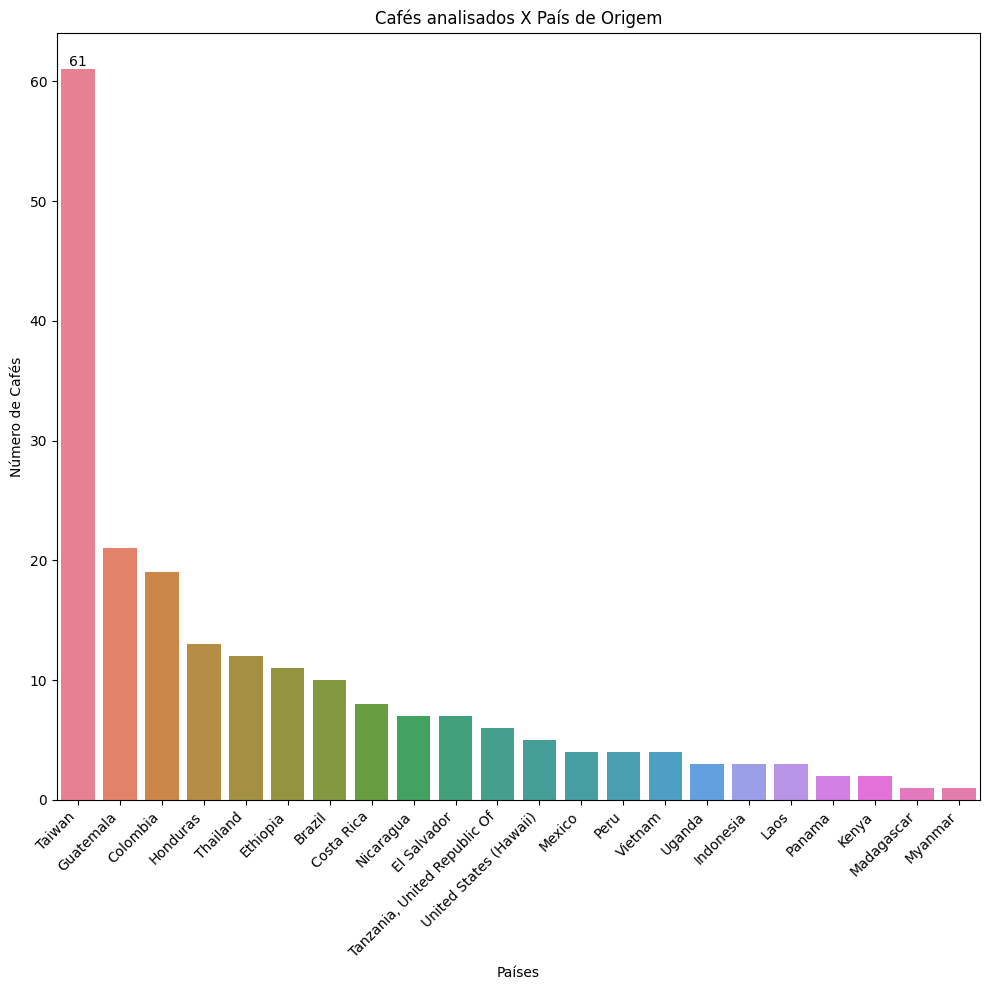

In [25]:
country = df_coffee['Country of Origin'].value_counts()
country_names = country.index

coffee_count = [country[index] for index in country_names]

plt.figure(figsize=(10, 10))

ax = sns.barplot(
    x = country_names,
    y = coffee_count,
    hue = country_names,
    legend = False,
)
ax.bar_label(ax.containers[0])

plt.xlabel('Países')
plt.ylabel('Número de Cafés')
plt.title('Cafés analisados X País de Origem')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [26]:
best_coffees = df_coffee.sort_values(by='Total Cup Points', ascending=False)
best_coffees[['Country of Origin', 'Total Cup Points']]

,Country of Origin,Total Cup Points
0,Colombia,89.33
1,Taiwan,87.58
2,Laos,87.42
3,Costa Rica,87.17
4,Colombia,87.08
...,...,...
202,Brazil,80.08
203,Nicaragua,80.00
204,Laos,79.67
205,El Salvador,78.08


In [27]:
mean_cup_scores = best_coffees.groupby('Country of Origin')['Total Cup Points'].mean().reset_index()

mean_cup_scores.sort_values(by='Total Cup Points', ascending=False)

,Country of Origin,Total Cup Points
4,Ethiopia,84.960909
17,"Tanzania, United Republic Of",84.735000
16,Taiwan,84.350328
5,Guatemala,84.301429
10,Madagascar,84.250000
19,Uganda,83.916667
1,Colombia,83.877368
2,Costa Rica,83.740000
8,Kenya,83.710000
7,Indonesia,83.693333


In [28]:
mean_cupscores_map = px.choropleth(
    mean_cup_scores,
    locations='Country of Origin',
    locationmode='country names',
    color='Total Cup Points',
    hover_name='Country of Origin',
    color_continuous_scale=px.colors.sequential.Cividis_r,
    title='Pontuação Média de Cafés por País',
)

mean_cupscores_map.show()

In [29]:
coffee_colors = px.pie(
    df_coffee,
    names='Color',
    title='Coloração dos Grãos (Pré-Torra)',
    hover_data='Color',
    color_discrete_sequence=px.colors.diverging.Earth_r,
)

coffee_colors.show()

In [30]:
proc_methods = df_coffee.groupby(by=['Processing Method'])['Total Cup Points'].mean().reset_index()

proc_methods

,Processing Method,Total Cup Points
0,Double Anaerobic Washed,86.290000
1,Double Carbonic Maceration / Natural,84.750000
2,Honey / Mosto,87.080000
3,Natural / Dry,83.700435
4,None,84.418000
5,Pulped natural / honey,83.552000
6,Semi Washed,82.710000
7,Washed / Wet,83.645726
8,Wet Hulling,84.250000


In [31]:
coffee_procmethod = px.bar(
    proc_methods,
    x='Processing Method',
    y='Total Cup Points',
    color='Processing Method',
    title='Média de Pontuação X Método de Processamento',
)

coffee_procmethod.show()

In [34]:
proc_method_altitude = px.scatter(
    df_coffee,
    x='Altitude',
    y='Total Cup Points',
    color='Country of Origin',
    # size='Total Cup Points',
    hover_data='Processing Method',
)

proc_method_altitude.show()

In [39]:
boxplot_altitude = px.box(
    df_coffee,
    y='Altitude',
    x='Country of Origin',
    title='Altitude by Country',
    color='Country of Origin',
)

boxplot_altitude.show()

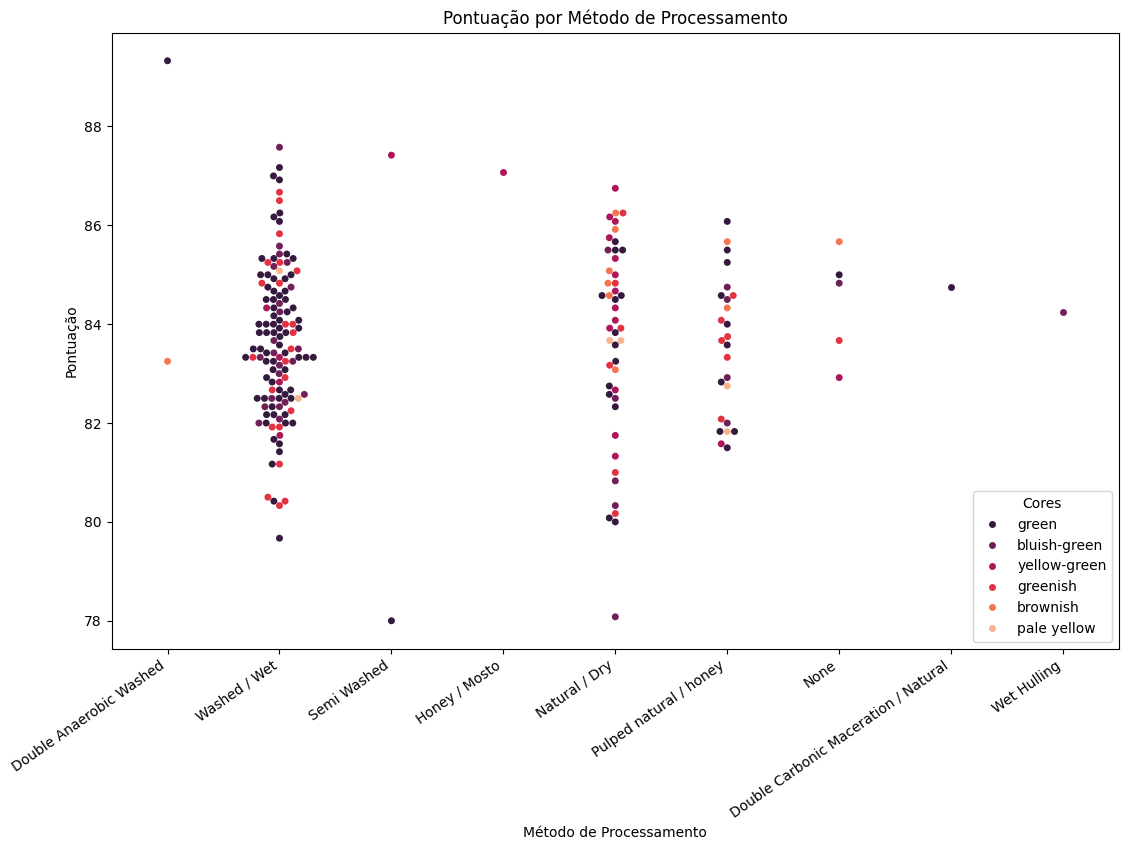

In [40]:
plt.figure(figsize=(13, 8))

sns.swarmplot(
    x=df_coffee['Processing Method'],
    y=df_coffee['Total Cup Points'],
    hue=df_coffee['Color'],
    size=5,
    palette='rocket',
)

plt.title('Pontuação por Método de Processamento')
plt.xlabel('Método de Processamento')
plt.ylabel('Pontuação')
plt.legend(title='Cores', loc='lower right')
plt.xticks(rotation=35, ha='right')
plt.show()

In [37]:
df_mean_altitude = df_coffee.groupby('Country of Origin')['Altitude'].mean().reset_index()

mean_altitude_by_country = px.choropleth(
    df_mean_altitude,
    locations='Country of Origin',
    locationmode='country names',
    color='Altitude',
    hover_name='Country of Origin',
    color_continuous_scale=px.colors.sequential.Plasma,
    title='Altitude Média por País',
)

mean_altitude_by_country.show()

# 4. Aplicando alguns modelos

# 5. Respondendo às perguntas